<a href="https://colab.research.google.com/github/dhruvsbe/Water-Classification-System/blob/main/waterClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

In [ ]:
waterData = pd.read_csv("/content/waterQuality1.csv")

In [ ]:
waterData.head(n = 5).style.background_gradient(cmap = "Blues_r")

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.650000,9.08,0.040000,2.850000,0.007000,0.350000,0.830000,0.170000,0.050000,0.200000,0.000000,0.054000,16.080000,1.130000,0.007000,37.750000,6.780000,0.080000,0.340000,0.020000,1
1,2.320000,21.16,0.010000,3.310000,0.002000,5.280000,0.680000,0.660000,0.900000,0.650000,0.650000,0.100000,2.010000,1.930000,0.003000,32.260000,3.210000,0.080000,0.270000,0.050000,1
2,1.010000,14.02,0.040000,0.580000,0.008000,4.240000,0.530000,0.020000,0.990000,0.050000,0.003000,0.078000,14.160000,1.110000,0.006000,50.280000,7.070000,0.070000,0.440000,0.010000,0
3,1.360000,11.33,0.040000,2.960000,0.001000,7.230000,0.030000,1.660000,1.080000,0.710000,0.710000,0.016000,1.410000,1.290000,0.004000,9.120000,1.720000,0.020000,0.450000,0.050000,1
4,0.920000,24.33,0.030000,0.200000,0.006000,2.670000,0.690000,0.570000,0.610000,0.130000,0.001000,0.117000,6.740000,1.110000,0.003000,16.900000,2.410000,0.020000,0.060000,0.020000,1


In [ ]:
waterData.tail(n = 5).style.background_gradient(cmap = "Blues_r")

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7994,0.050000,7.78,0.000000,1.950000,0.040000,0.100000,0.030000,0.030000,1.370000,0.000000,0.000000,0.197000,14.290000,1.000000,0.005000,3.570000,2.130000,0.090000,0.060000,0.030000,1
7995,0.050000,24.22,0.020000,0.590000,0.010000,0.450000,0.020000,0.020000,1.480000,0.000000,0.000000,0.031000,10.270000,1.000000,0.001000,1.480000,1.110000,0.090000,0.100000,0.080000,1
7996,0.090000,6.85,0.000000,0.610000,0.030000,0.050000,0.050000,0.020000,0.910000,0.000000,0.000000,0.182000,15.920000,1.000000,0.000000,1.350000,4.840000,0.000000,0.040000,0.050000,1
7997,0.010000,10,0.010000,2.000000,0.000000,2.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
7998,0.040000,6.85,0.010000,0.700000,0.030000,0.050000,0.010000,0.030000,1.000000,0.000000,0.000000,0.182000,15.920000,1.000000,0.000000,1.350000,4.840000,0.000000,0.040000,0.050000,1


In [ ]:
waterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
waterData.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [ ]:
waterData['ammonia'] = waterData['ammonia'].replace('#NUM!',np.nan)
waterData['ammonia'] = waterData['ammonia'].astype('float')
waterData['is_safe'] = waterData['is_safe'].replace('#NUM!',np.nan)
waterData['is_safe'] = waterData['is_safe'].astype('float')

In [ ]:
waterData.dropna(axis='index',inplace=True)

In [ ]:
waterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [ ]:
waterData.head(n = 10).style.background_gradient(cmap = "Blues_r")

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.650000,9.080000,0.040000,2.850000,0.007000,0.350000,0.830000,0.170000,0.050000,0.200000,0.000000,0.054000,16.080000,1.130000,0.007000,37.750000,6.780000,0.080000,0.340000,0.020000,1.000000
1,2.320000,21.160000,0.010000,3.310000,0.002000,5.280000,0.680000,0.660000,0.900000,0.650000,0.650000,0.100000,2.010000,1.930000,0.003000,32.260000,3.210000,0.080000,0.270000,0.050000,1.000000
2,1.010000,14.020000,0.040000,0.580000,0.008000,4.240000,0.530000,0.020000,0.990000,0.050000,0.003000,0.078000,14.160000,1.110000,0.006000,50.280000,7.070000,0.070000,0.440000,0.010000,0.000000
3,1.360000,11.330000,0.040000,2.960000,0.001000,7.230000,0.030000,1.660000,1.080000,0.710000,0.710000,0.016000,1.410000,1.290000,0.004000,9.120000,1.720000,0.020000,0.450000,0.050000,1.000000
4,0.920000,24.330000,0.030000,0.200000,0.006000,2.670000,0.690000,0.570000,0.610000,0.130000,0.001000,0.117000,6.740000,1.110000,0.003000,16.900000,2.410000,0.020000,0.060000,0.020000,1.000000
5,0.940000,14.470000,0.030000,2.880000,0.003000,0.800000,0.430000,1.380000,0.110000,0.670000,0.670000,0.135000,9.750000,1.890000,0.006000,27.170000,5.420000,0.080000,0.190000,0.020000,1.000000
6,2.360000,5.600000,0.010000,1.350000,0.004000,1.280000,0.620000,1.880000,0.330000,0.130000,0.007000,0.021000,18.600000,1.780000,0.007000,45.340000,2.840000,0.100000,0.240000,0.080000,0.000000
7,3.930000,19.870000,0.040000,0.660000,0.001000,6.220000,0.100000,1.860000,0.860000,0.160000,0.005000,0.197000,13.650000,1.810000,0.001000,53.350000,7.240000,0.080000,0.080000,0.070000,0.000000
8,0.600000,24.580000,0.010000,0.710000,0.005000,3.140000,0.770000,1.450000,0.980000,0.350000,0.002000,0.167000,14.660000,1.840000,0.004000,23.430000,4.990000,0.080000,0.250000,0.080000,1.000000
9,0.220000,16.760000,0.020000,1.370000,0.007000,6.400000,0.490000,0.820000,1.240000,0.830000,0.830000,0.109000,4.790000,1.460000,0.010000,30.420000,0.080000,0.030000,0.310000,0.010000,1.000000


In [149]:
waterData.tail(n = 10).style.background_gradient(cmap = "Blues_r")

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7989,0.010000,27.730000,0.060000,0.770000,0.090000,0.200000,0.030000,0.000000,0.580000,0.000000,0.000000,0.112000,11.740000,1.000000,0.007000,7.580000,7.210000,0.070000,0.040000,0.090000,0.000000
7990,0.000000,3.110000,0.070000,1.240000,0.070000,0.060000,0.030000,0.040000,0.740000,0.000000,0.000000,0.016000,15.150000,1.000000,0.005000,0.460000,6.240000,0.030000,0.090000,0.050000,0.000000
7991,0.030000,8.940000,0.020000,1.250000,0.080000,0.220000,0.020000,0.050000,0.710000,0.000000,0.000000,0.112000,11.970000,1.000000,0.001000,7.180000,1.730000,0.000000,0.040000,0.060000,1.000000
7992,0.040000,10.840000,0.060000,0.490000,0.040000,0.080000,0.030000,0.080000,0.490000,0.000000,0.000000,0.151000,14.440000,1.000000,0.003000,0.340000,2.160000,0.060000,0.030000,0.050000,1.000000
7993,0.020000,5.240000,0.050000,0.770000,0.020000,0.570000,0.040000,0.030000,0.150000,0.000000,0.000000,0.085000,19.410000,1.000000,0.001000,1.680000,3.550000,0.050000,0.070000,0.070000,1.000000
7994,0.050000,7.780000,0.000000,1.950000,0.040000,0.100000,0.030000,0.030000,1.370000,0.000000,0.000000,0.197000,14.290000,1.000000,0.005000,3.570000,2.130000,0.090000,0.060000,0.030000,1.000000
7995,0.050000,24.220000,0.020000,0.590000,0.010000,0.450000,0.020000,0.020000,1.480000,0.000000,0.000000,0.031000,10.270000,1.000000,0.001000,1.480000,1.110000,0.090000,0.100000,0.080000,1.000000
7996,0.090000,6.850000,0.000000,0.610000,0.030000,0.050000,0.050000,0.020000,0.910000,0.000000,0.000000,0.182000,15.920000,1.000000,0.000000,1.350000,4.840000,0.000000,0.040000,0.050000,1.000000
7997,0.010000,10.000000,0.010000,2.000000,0.000000,2.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
7998,0.040000,6.850000,0.010000,0.700000,0.030000,0.050000,0.010000,0.030000,1.000000,0.000000,0.000000,0.182000,15.920000,1.000000,0.000000,1.350000,4.840000,0.000000,0.040000,0.050000,1.000000


In [ ]:
x = ['aluminium','ammonia','arsenic','barium','cadmium','chloramine','chromium', 'copper','flouride','bacteria','viruses','lead','nitrates','nitrites','mercury','perchlorate','radium','selenium','silver','uranium']
y = 'is_safe'

[0.20781716 0.0475146  0.06758968 0.02891468 0.11682189 0.04068756
 0.03227582 0.02348292 0.01926728 0.02872012 0.03151449 0.02356699
 0.03884846 0.03295076 0.01416477 0.11470178 0.03324456 0.0162694
 0.05112049 0.03052659]


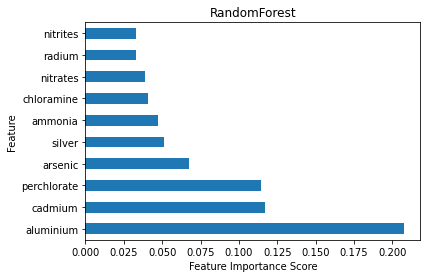

In [ ]:
import matplotlib.pyplot as plt
x = waterData.iloc[:,0:20]  #independent columns
y = waterData.iloc[:,-1]    #target column i.e price range
rf = RandomForestClassifier()
rf.fit(x,y)
print(rf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('RandomForest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
features = ['uranium','radium','nitrates','chloramine','ammonia','silver','arsenic','perchlorate','cadmium','aluminium']
label = 'is_safe'

In [ ]:
train, test = train_test_split(waterData, test_size = 0.25, random_state = 1)
trainX = train[features]
trainY = train[label]
testX = test[features]
testY = test[label]

In [ ]:
rf.fit(trainX, trainY)
y_pred = rf.predict(testX)
print("Accuracy: ", metrics.accuracy_score(testY, y_pred))

Accuracy:  0.9664832416208105


In [ ]:
import pickle 
pickle.dump(rf, open("water.pkl", "wb"))

In [ ]:
predict = {}

print("Please type the integers as prompted")
for feature in features:
  val = input(feature + ":")
  predict[feature] = val 

predict = pd.DataFrame(predict, index=[0])

print 

output = rf.predict(predict)

In [ ]:
print("Model Prediction of \'is_safe\' — ", end = "")
print(output)
print()

if output == [1]:
  print("Based on the model, this data indicates the water is safe.")
if output == [0]:
  print("Based on the model, this data indicates the water is NOT safe.")